# Problem Statement

**Part 1:** 

Use the **Fashion-MNIST** dataset for this question.

1a) Load the dataset and implement the K Means algorithm. You need to find the optimal number of clusters using the
> i) elbow method

> ii) silhoette method



1b) Define the initial clusters’ centroids using:</br>
> i) Forgy</br>

> ii) Random Partition

1c) Experiment with different distance measures [Euclidean distance, Manhattan distance].

1d) Plot the error vs number of clusters graph while using the elbow method and silhouette 
    method. Report the optimal number of clusters found.


1e) Visualize the dataset to depict the clusters formed. (prefer T-SNE)

</br>
</br>
</br>
</br>


**Part 2:**
</br>
In this task, you need to implement Hierarchical clustering (agglomerative) on the same dataset.

2a) visualize a dendogram and find out the optimal number of clusters with the help of Dendogram. Explain the procedure.


2b) Implement Hierarchical clustering using: </br>
> i) single linkage

> ii) Complete linkage

>Visualize the clusters obtained using these linkages and compare. 



## ===================================================================

# RESULTS in saved_results folder for all 4 major models (details below)

# Answers

### Loading relevant libraries

In [73]:
import os
from copy import deepcopy
import sys
import pandas as pd
import numpy as np
# Needed for plotting
import matplotlib.colors
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import sklearn.datasets as dt
import json
from IPython.lib.deepreload import reload
from helper import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading the relevant dataset

In [74]:
from keras.datasets import fashion_mnist
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
print("Number of samples in training set is ",len(trainX))
print("Number of samples in test set is ",len(testX))
print("Shape of train X is ",trainX.shape)
del trainX
del trainy

Number of samples in training set is  60000
Number of samples in test set is  10000
Shape of train X is  (60000, 28, 28)


Due to lack of computing feasibility, I train the 56 versions of K means on a dataset of size 10k

In [75]:
testX=testX.astype('float64')
testy=testy.astype('float64')

In [76]:
testX.shape

(10000, 28, 28)

In [77]:
testX=testX[:10000,:,:]
testy=testy[:10000]

In [78]:
testX.shape

(10000, 28, 28)

###### Testing everything on a dummy dataset

In [79]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
# 332288, 88CCEE, 44AA99, 117733, 999933, DDCC77, CC6677, 882255, AA4499
init_colors=["#332288", "#88CCEE", "#44AA99", "#117733", "#999933", "#DDCC77", "#CC6677", "#882255", "#AA4499"]

color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue","yellow","black","green","violet","gold","tomato"])

color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("",init_colors )

In [80]:
x_syn=None
labels_syn=None
actual_clusters=5

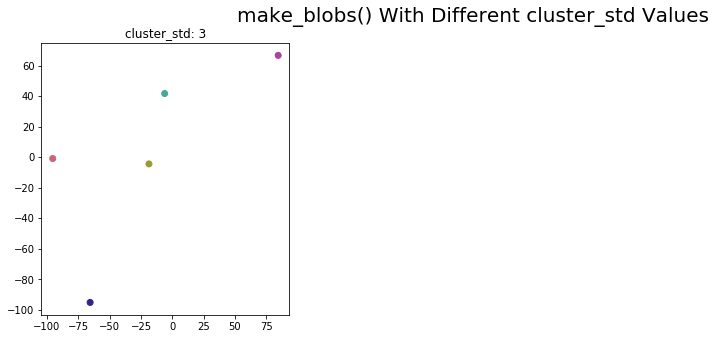

In [81]:
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(16,5))
plt_ind_list = np.arange(3)+131

for std,plt_ind in zip([3,1,10],plt_ind_list):
    x, label = dt.make_blobs(n_features=2,
                             n_samples=5,
                             centers=actual_clusters,
                             cluster_std=std,
                             center_box=(-100, 100),
                             random_state=rand_state)
    #print(x.shape)
    #print(label)
    #print(x)
    x_syn=deepcopy(x)
    labels_syn=deepcopy(label)
    
    
    plt.subplot(plt_ind)    
    my_scatter_plot = plt.scatter(x[:,0],
                                  x[:,1],
                                  c=label,
                                  vmin=min(label),
                                  vmax=max(label),
                                  cmap=color_map_discrete)
    plt.title('cluster_std: '+str(std))
    break

fig.subplots_adjust(hspace=0.3,wspace=.3)
plt.suptitle('make_blobs() With Different cluster_std Values',fontsize=20)
plt.show()

In [82]:
def plot_blobs(curr_clusters):
    fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(16,5))

    plt.subplot(plt_ind)    
    my_scatter_plot = plt.scatter(x[:,0],
                                  x[:,1],
                                  c=curr_clusters,
                                  vmin=min(label),
                                  vmax=max(label),
                                  cmap=color_map_discrete)

In [83]:
def plot_line_graph(arr):
    # data to be plotted
    x = np.arange(0, len(arr))
    y = arr

    # plotting
    plt.title("Line graph")
    plt.xlabel("X axis")
    plt.ylabel("Y axis")
    plt.plot(x, y, color ="green")
    plt.show()

### Visualizing the data with their original labels

In [84]:
#plot_tsne_visual(np.array(list(map(lambda x: x.flatten(),testX))),testy)

### ==========================================================

In [85]:
params_vals={
    "init_method":["rand_part","forgy"],
    "dist_metric":["euclidean","manhattan"]

}

In [86]:
def experiment_with_diff_cluster_sizes(curr_init_method, curr_dist_metric, curr_k_val):
    #############################################
    # This function takes 3 input : what method to use to determine initial cluster centres, what distance metric to use and 
    # how many clusters to consider
    ###################################################
    for num_clusters in range(curr_k_val, curr_k_val+1):
        print("Curr number of clusters is ", num_clusters)

        k_means_class=Kmeans(testX, testy,num_clusters,curr_init_method,curr_dist_metric)
        #plot_blobs(k_means_class.current_clusters)
        '''x_elbow.append(num_clusters)
        y_elbow.append(k_means_class.optimizing_function_arr[-1])
        y_sil.append(k_means_class.final_sil_score)
        predictions.append(k_means_class.current_clusters)'''
        print("Number of unique clusters made is ", len(set(k_means_class.current_clusters)))
        # plt.show()
        print("##############################")
        ans_dict={}
        ans_dict['init_method_used']=curr_init_method
        ans_dict['dist_metric_used']=curr_dist_metric
        ans_dict['k_vals']=curr_k_val
        ans_dict['elbow_vals']=k_means_class.optimizing_function_arr
        ans_dict['sil_vals']=k_means_class.final_sil_score
        ans_dict['all_predictions']=list(k_means_class.current_clusters)
    return ans_dict

##### Some basic function checks

In [87]:
v1=np.array([1,2,3])
v2=np.array([2,3,1])
print(LA.norm(v1-v2))
print(LA.norm(v1)**2+LA.norm(v2)**2-2*np.dot(v1,np.transpose(v2)))

2.449489742783178
6.0


In [88]:
LA.norm(v1)

3.7416573867739413

In [89]:
np.dot(v1,np.transpose(v2))

11

In [90]:
v1=np.array(np.array(list(map(lambda x: x.flatten(),[testX[0]])))[0])
v2=np.array(np.array(list(map(lambda x: x.flatten(),[testX[1]])))[0])
print(LA.norm(v1-v2)**2)
print(LA.norm(v1)**2+LA.norm(v2)**2-2*np.dot(v1,np.transpose(v2)))

16424594.0
16424594.0


In [91]:
arr=np.array(v1[:222])
print(np.dot(arr, arr))
print(LA.norm(arr)**2)

1428.0
1428.0000000000002


### Method:
Now, 

* There are 2 possible options for deciding initial cluster centres: random initialization and forgy.

* There are 2 possible options for deciding what distance metric to use: euclidean method and manhattan distance.
* Also, I am simulating each possible method for all k values from 3 to 14

So, there are a total of 2 x 2 x 12 = 48 models versions which I test here

In [92]:
def plot_eval_metric(x_arr, y_arr, init_method, dist_metric, eval_type):
    figure(figsize=(8, 6), dpi=80)
    plt.title(f"Evaluation with config |{init_method}|->|{dist_metric}| via {eval_type}",fontsize=18)
    plt.xlabel("number of clusters",fontsize=15)
    plt.ylabel("Evaluation metric value",fontsize=15)
    plt.plot(x_arr, y_arr)
    plt.show()
    return

#### Describing the range of "k" vals for which we indent to test

In [93]:
lb_k_val=3
ub_k_val=14

### Note: Since clustering takes time on such a large dataset, I have stored the results in JSON files, which allows me to complete this problem accross several days without training each time separately.

##### Euclidean metric with Forgy for all k values

In [ ]:
init_method="forgy"
dist_metric="euclidean"
for i in range(lb_k_val, ub_k_val+1):
    curr_ans_dict=experiment_with_diff_cluster_sizes(init_method, dist_metric,i)
    #plot_eval_metric(curr_ans_dict['k_vals'],curr_ans_dict['elbow_vals'],init_method, dist_metric,"elbow_method")
    #plot_eval_metric(curr_ans_dict['k_vals'],curr_ans_dict['sil_vals'],init_method, dist_metric,"silhoutte_method")
    with open(f"{init_method}_{dist_metric}_{i}.json",'w') as fd:
        json.dump(curr_ans_dict, fd, indent=1)
    del curr_ans_dict
    print("########\n\n##################\n\n")

##### Euclidean metric with random initialization for all k values

In [ ]:
init_method="rand_part"
dist_metric="euclidean"
for i in range(lb_k_val, ub_k_val+1):
    curr_ans_dict=experiment_with_diff_cluster_sizes(init_method, dist_metric,i)
    #plot_eval_metric(curr_ans_dict['k_vals'],curr_ans_dict['elbow_vals'],init_method, dist_metric,"elbow_method")
    #plot_eval_metric(curr_ans_dict['k_vals'],curr_ans_dict['sil_vals'],init_method, dist_metric,"silhoutte_method")
    with open(f"{init_method}_{dist_metric}_{i}.json",'w') as fd:
        json.dump(curr_ans_dict, fd, indent=1)
    del curr_ans_dict
    print("########\n\n##################\n\n")

##### Manhattan distance metric with Forgy for all k values

In [ ]:
init_method="forgy"
dist_metric="manhattan"
for i in range(lb_k_val, ub_k_val+1):
    curr_ans_dict=experiment_with_diff_cluster_sizes(init_method, dist_metric,i)
    #plot_eval_metric(curr_ans_dict['k_vals'],curr_ans_dict['elbow_vals'],init_method, dist_metric,"elbow_method")
    #plot_eval_metric(curr_ans_dict['k_vals'],curr_ans_dict['sil_vals'],init_method, dist_metric,"silhoutte_method")
    with open(f"{init_method}_{dist_metric}_{i}.json",'w') as fd:
        json.dump(curr_ans_dict, fd, indent=1)
    del curr_ans_dict
    print("########\n\n##################\n\n")

##### Euclidean metric with random initialization for all k values

In [ ]:
init_method="rand_part"
dist_metric="manhattan"
for i in range(lb_k_val, ub_k_val+1):
    curr_ans_dict=experiment_with_diff_cluster_sizes(init_method, dist_metric,i)
    #plot_eval_metric(curr_ans_dict['k_vals'],curr_ans_dict['elbow_vals'],init_method, dist_metric,"elbow_method")
    #plot_eval_metric(curr_ans_dict['k_vals'],curr_ans_dict['sil_vals'],init_method, dist_metric,"silhoutte_method")
    with open(f"{init_method}_{dist_metric}_{i}.json",'w') as fd:
        json.dump(curr_ans_dict, fd, indent=1)
    del curr_ans_dict
    print("########\n\n##################\n\n")

### import files

In [94]:
params_vals={
    "init_method":["rand_part","forgy"],
    "dist_metric":["euclidean","manhattan"]

}

In [95]:
sil_dict={}
elbow_dict=dict()
k_vals=[k for k in range(lb_k_val, ub_k_val+1)]

In [96]:
for curr_init in params_vals["init_method"]:
    for curr_dist in params_vals["dist_metric"]:
        this_key=f"{curr_init}_{curr_dist}"
        sil_dict[this_key]=[]
        elbow_dict[this_key]=[]
        for curr_k_val in range(lb_k_val, ub_k_val+1):
            with open(f"./saved_results/{curr_init}_{curr_dist}_{curr_k_val}.json",'r') as fd:
                df=json.load(fd)
                sil_dict[this_key].append(df['sil_vals'])
                elbow_dict[this_key].append(df['elbow_vals'][-1])

In [97]:
sil_dict.keys()

dict_keys(['rand_part_euclidean', 'rand_part_manhattan', 'forgy_euclidean', 'forgy_manhattan'])

## INITIAL TSNE

In [98]:
flattened_test_x=np.array(list(map(lambda x: x.flatten(),testX)))

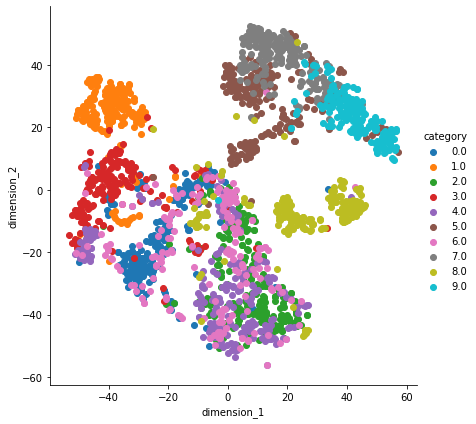

In [99]:
plot_tsne_visual(np.array(list(map(lambda x: x.flatten(),testX))),testy)

### RANDOM INIT EUCLIDEAN

#### As per silhoutte, optimal number seems to be 7

Text(0.5, 1.0, 'Silhoutte')

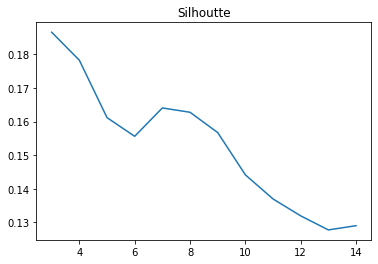

In [100]:
curr_key="rand_part_euclidean"
plt.plot(k_vals, sil_dict[curr_key])
plt.title("Silhoutte")

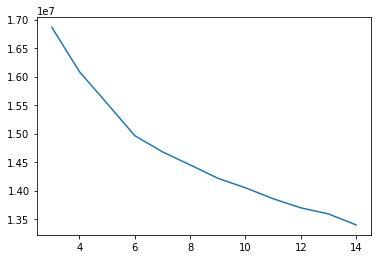

In [101]:
plt.plot(k_vals, elbow_dict[curr_key])

#### A very slightly elbow seems to come at k=6

In [105]:
use_k_val=6
with open(f"./saved_results/{curr_key}_{use_k_val}.json",'r') as fd:
    df=json.load(fd)
    ans=df['all_predictions']

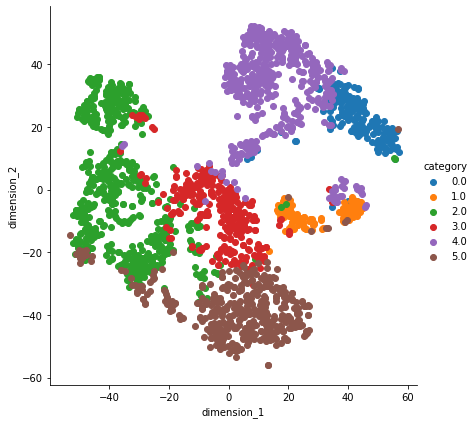

In [109]:
plot_tsne_visual(np.array(list(map(lambda x: x.flatten(),testX))),ans)

## FORGY MANHATTAN

As per silhoutte, k=5 and k=9 both show peaks

Text(0.5, 1.0, 'Silhoutte')

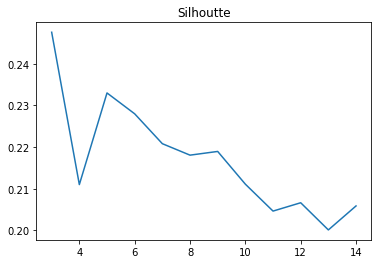

In [102]:
curr_key="forgy_manhattan"
plt.plot(k_vals, sil_dict[curr_key])
plt.title("Silhoutte")

As per ELBOW, K suggested seems to be 12 as per below plot

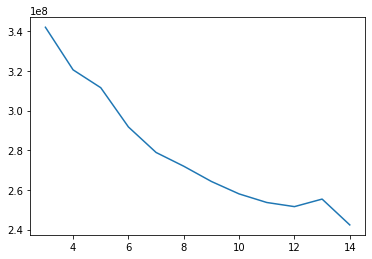

In [103]:
plt.plot(k_vals, elbow_dict[curr_key])

In [110]:
use_k_val=12
with open(f"./saved_results/{curr_key}_{use_k_val}.json",'r') as fd:
    df=json.load(fd)
    ans=df['all_predictions']

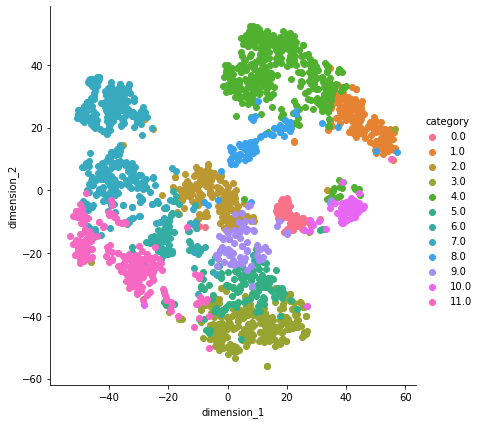

In [111]:
plot_tsne_visual(np.array(list(map(lambda x: x.flatten(),testX))),ans)

Also, on comparison with the T_SNE constructed with real-world actual labels, we see that visually similar digits like 6 and 0 have been clustered together. 

## CODE IN HELPER.py, saved results for all MODELS (42 files) in saved_results folder.

# =====================================

# NOTE Please find code for elbow(), silhoutte(), tsne plotting and KMeans class in "helper.py" from where I am importing them

In [43]:
#implement elbow method from scratch
def elbow():
    pass

In [44]:
#implement silhouette method from scratch
def silhouette():
    pass


In [45]:
#implement Kmeans from scratch
class Kmeans:
    def __init__(self):
        pass

# Hierarchical clustering

In [131]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler

### Q) visualize a dendogram and find out the optimal number of clusters with the help of Dendogram. Explain the procedure.

### Ans: 
The vertical axis of the dendrogram represents the distance or dissimilarity between clusters.
The horizontal axis represents the samples and cluster memberships at a current stage.
Each joining (fusion) of two clusters is represented on the diagram by the splitting of a vertical line into two vertical lines.

**Question**: Explain the procedure to find the optimal number of clusters using dendogram

Answer: 
In the dendrogram above, the height of the dendrogram indicates the order in which the clusters were joined. 
Although, it is not customary to read dendogram via DENDOGRAM and dendogram is just used to see estimate the possible number of clusters. One thumb rule is to to see the maximum gap  between two consecutive heights (levels) in a dendogram. The split with the maximum gap with the next level can be chosen as the final split and number of clusters can be found by drawing a horizontal line and seeing at how many points does it cut any vertical line.



### Smaller set for ease of computation

In [132]:
flattened_test_x=np.array(list(map(lambda x: x.flatten(),testX)))

In [133]:
truncate_num=3000
flattened_test_x=flattened_test_x[:truncate_num,:]
flattened_test_y=testy[:truncate_num]

In [134]:
flattened_test_x.shape

(3000, 784)

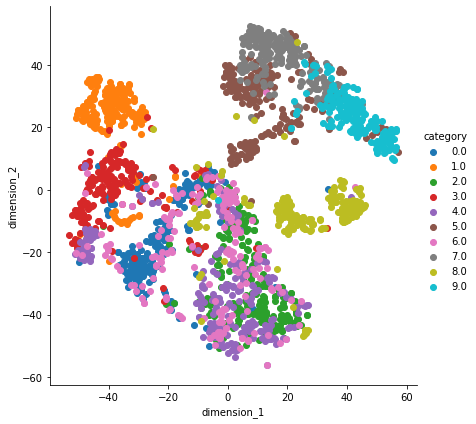

In [135]:
plot_tsne_visual(flattened_test_x,flattened_test_y)

In [136]:
#visualize a dendogram

def plot_dendogram(x_data,method_to_use="ward" ): 
    plt.rcParams["figure.figsize"] = (12,12)
    dendrogram = sch.dendrogram(sch.linkage(x_data, method=method_to_use))
    plt.show()
    

### as per method,  maximum gap occurs between lines at 70k and 52k approx. SO, 2 clusters seems to be optimal here. But the gaps between 38k and 32k also seems reasonable though not optimal.For sake of variety, I choose k =4 for SINGLE LINKAGE and k=4 for complete linkage.

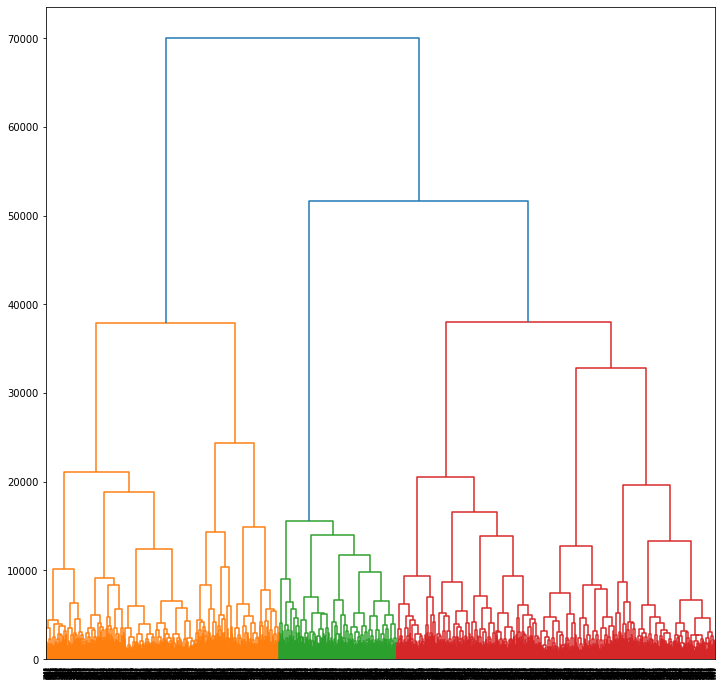

In [137]:
plot_dendogram(flattened_test_x, "ward")

In [138]:
# implement hierarchical clustering ( you can use scikit module)

def apply_hierarchical_clustering(X_data,num_clusters,linkage_method ):
    model = AgglomerativeClustering(n_clusters=num_clusters,\
                                    affinity='euclidean',\
                                    linkage=linkage_method)

    model.fit(X_data)
    labels = model.labels_
    return labels

In [139]:
#visualisation of clusters using single linkage and complete linkage





### Agglomerative clustering using SINGLE LINKAGE

#### Find labels

In [140]:
single_agg_labels=apply_hierarchical_clustering(flattened_test_x, 4, "single")

#### Plot using T-sne

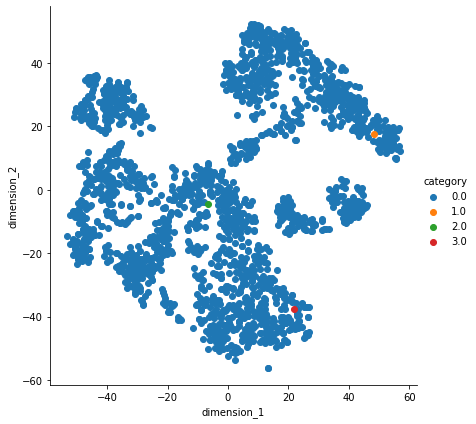

In [141]:
plot_tsne_visual(flattened_test_x,single_agg_labels)

#### Make dendogram for this method

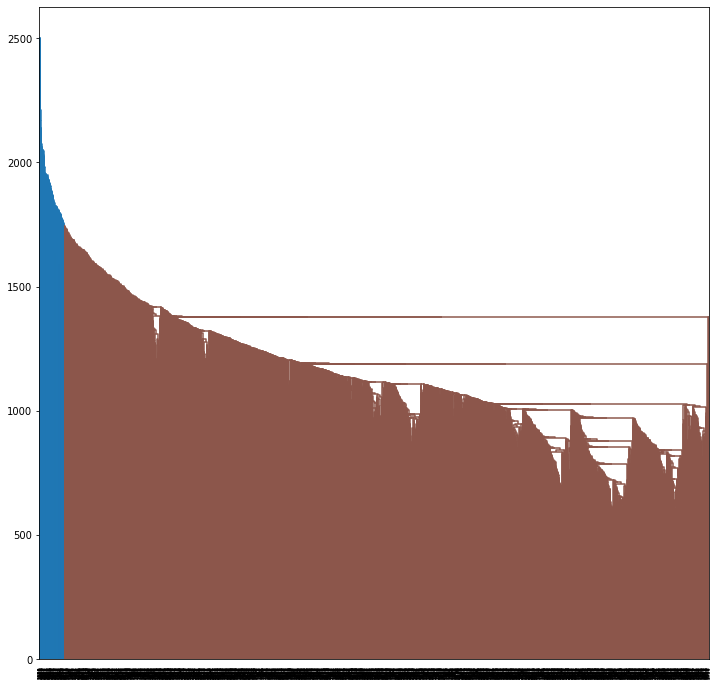

In [142]:
plot_dendogram(flattened_test_x, "single")

### Agglomerative clustering using complete LINKAGE

#### Find labels

In [143]:
com_agg_labels=apply_hierarchical_clustering(flattened_test_x, 4, "complete")

#### Plot using T-sne

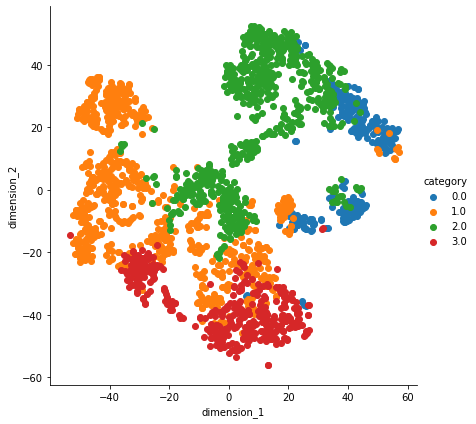

In [144]:
plot_tsne_visual(flattened_test_x,com_agg_labels)

#### Make dendogram for this method

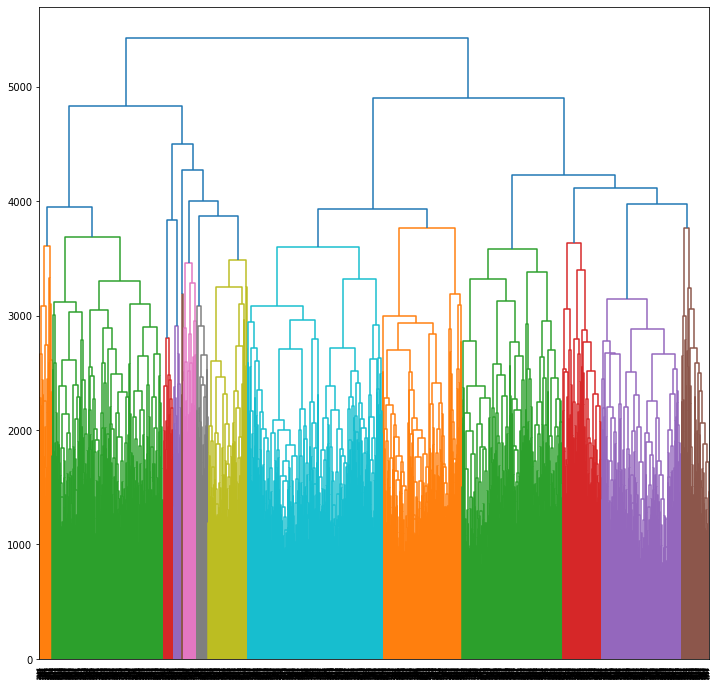

In [145]:
plot_dendogram(flattened_test_x, "complete")

**Question:** Mention the differences observed using single and complete linkage:


In single linkage, proximity between two clusters is the proximity between their two closest objects.
As a result, on plotting with num_clusters=4. As a result, in the t-sne plot, we see all the points belong to category zero almost and other categories have one  point each. This is due to the fact that keeping just one point in other classes very near to atleast one point of the main dominant class (class zero), leads to less distance. 
Also, when ZEROth cluster was partially formed, for yet to be clustered points, t must have happened that atleast some sample of zeroth cluster was very close even though on average some other cluster may have been better, leading to merging with zeroth cluster due to the GREEDY DECISION.


In complete linkage, proximity between two clusters is the proximity between their two most distant objects.
As a result, the greedy problem as happened in case of single linkage would not have happened here.
As a result, we see clusters more or less make sense. Also, comparing t-sne for complete linkage with t-sne with real-world labels, we see DIGITS similar to each other like 8 and 9 have been clustered together which intuitivel makes sense.